# Skill Statistics

The [`Comparer`](../api/Comparer.html#modelskill.Comparer) and
[`ComparerCollection`](../api/ComparerCollection.html#modelskill.ComparerCollection)
objects in ModelSkill allow for detailed performance evaluation of
models through skill metrics. These metrics are organized in a
[`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) object,
which can be further filtered, analyzed, and visualized to gain insights
into model accuracy and reliability.

In [1]:
import modelskill as ms
o1 = ms.observation("../data/SW/HKNA_Hm0.dfs0", item=0,
                    x=4.2420, y=52.6887,
                    name="HKNA")
o2 = ms.observation("../data/SW/eur_Hm0.dfs0", item=0,
                    x=3.2760, y=51.9990, 
                    name="EPL")
m1 = ms.model_result("../data/SW/HKZN_local_2017_DutchCoast.dfsu", 
                      item="Sign. Wave Height",
                      name="m1")
m2 = ms.model_result("../data/SW/CMEMS_DutchCoast_2017-10-28.nc", 
                      item="VHM0",
                      name="m2")

In [2]:
cc = ms.match([o1, o2], [m1, m2])
cc

<ComparerCollection>
Comparers:
0: HKNA - Significant wave height [m]
1: EPL - Significant wave height [m]

## Generating a SkillTable

The
[`skill`](../api/ComparerCollection.html#modelskill.ComparerCollection.skill)
and
[`mean_skill`](../api/ComparerCollection.html#modelskill.ComparerCollection.mean_skill)
methods generate a
[`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) by
comparing observations and model results using various skill metrics. It
supports grouping and aggregation through the `by` parameter.

**Syntax:** `ComparerCollection.skill(by=None, metrics=None)`

| Parameter | Type | Description | Default |
|--------|-----------|---------------------------------------------|---------|
| `by` | str or list | Group by column names, temporal bins (e.g., `freq:M` for monthly), or attributes like `attrs`. | None |
| `metrics` | list | List of metrics (e.g., `rmse`, `bias`). Default uses predefined metrics. | None |
|  |  |  |  |

**Example 1: Generating a SkillTable**

In [3]:
sk = cc.skill(metrics=["bias", "rmse", "si"])
sk

This generates a `SkillTable` containing metrics for all observations
and models.

**Example 2: Grouping skill scores**

In [4]:
sk_by6hr = cc.skill(by=['model','freq:6h'], 
                    metrics=["bias", "mae"]
                    )
sk_by6hr

Here, skill scores are grouped by 6 hour (`freq:6h`), but it could also
be by month or year, making it possible to analyze performance trends
over time.

## Filtering a SkillTable

The [`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) object
supports several methods for filtering and refining data. The `sel()`
method allows selection of specific models or observations, while the
`query()` method enables flexible condition-based filtering.

**Example 3: Selecting a specific model**

In [5]:
sk_m1 = sk.sel(model='m1')
sk_m1

This filters the `SkillTable` to include results for the model named
“m1”. See more about filtering on the [Selecting data
page](selecting-data.qmd).

## Sorting a SkillTable

The [`SkillTable`](../api/SkillTable.html#modelskill.SkillTable)
supports sorting by index or values, and swapping levels in a MultiIndex
to reorganize the data.

**Example 4: Sorting by index**

In [6]:
sk_sorted = sk.sort_index()
sk_sorted

This sorts the `SkillTable` by its index levels.

**Example 5: Sorting by a specific index level**

In [7]:
sk_sorted_obs = sk.sort_index(level="observation")
sk_sorted_obs

Here, the table is sorted specifically by the `observation` level in the
index.

**Example 6: Sorting by values**

In [8]:
sk_sorted_values = sk.sort_values("rmse")
sk_sorted_values

This sorts the table by the `rmse` column in ascending order.

**Example 7: Sorting by multiple values**

In [9]:
sk_sorted_multi = sk.sort_values(["n", "rmse"], ascending=[True, False])
sk_sorted_multi

Here, the table is sorted first by column `n` (ascending) and then by
`rmse` (descending).

**Example 8: Swapping index levels**

In [10]:
sk_swapped = sk.swaplevel("model", "observation").sort_index()
sk_swapped

This swaps the `model` and `observation` levels in the MultiIndex and
sorts the resulting table.

## Rounding and Formatting

The `round()` method can be used to round all skill values to a
specified number of decimal places, making the table more readable.

**Example 9: Rounding skill values**

In [11]:
sk.round(decimals=2)

This rounds all values in the
[`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) to two
decimal places.

## Visualizing Skill Metrics

The [`SkillTable`](../api/SkillTable.html#modelskill.SkillTable)
integrates table styling and plotting capabilities, allowing you to
quickly visualize skill metrics.

**Example 10: Styling the SkillTable**

In [12]:
sk.style()

The `style()` method applies color-based styling to the table, making it
easier to identify high and low values.

Individual metrics can be accessed as columns and plotted using
pandas-style plotting.

**Example 11: Plotting a bar chart for RMSE**

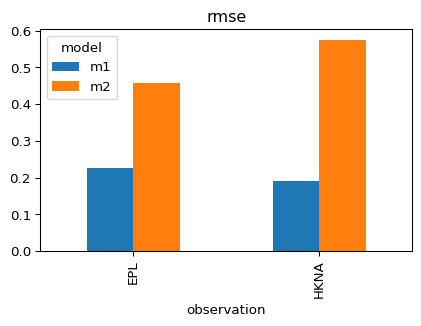

In [13]:
sk.rmse.plot.bar(figsize=(5,3))

This creates a bar chart showing RMSE values for each model-observation
pair.

**Example 12: Line plot**

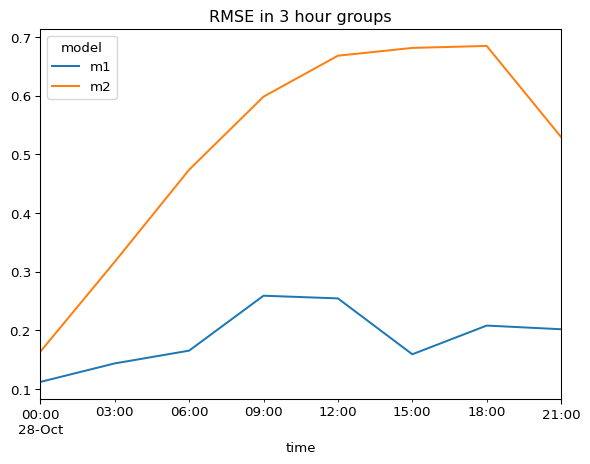

In [14]:
sk_by3hr = cc.skill(by=['model','freq:3h'])
sk_by3hr.rmse.plot.line(title="RMSE in 3 hour groups")

This generates a line plot showing RMSE values over the index.

**Example 13: Bar chart**

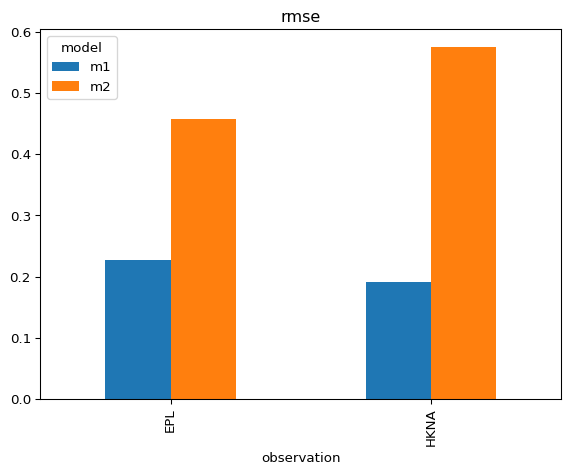

In [15]:
sk.rmse.plot.bar()

This creates a bar chart showing RMSE values for each model-observation
pair.

**Example 14: Horizontal bar chart**

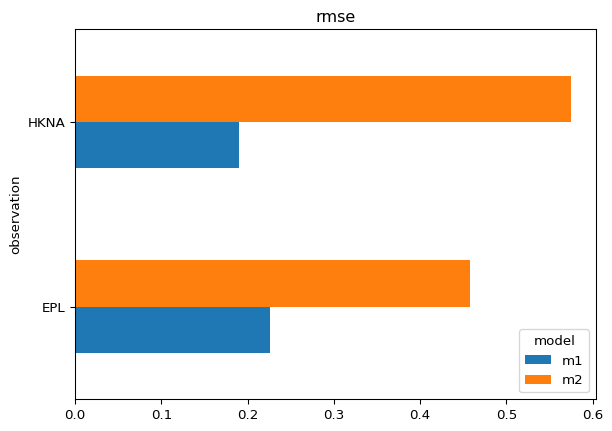

In [16]:
sk.rmse.plot.barh()

This generates a horizontal bar chart for RMSE values.

**Example 15: Colored grid**

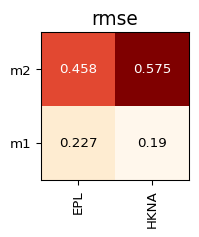

In [17]:
sk.rmse.plot.grid()

This produces a colored grid representation of the skill metrics, which
can help identify patterns.

## Exporting a SkillTable

For further analysis, the
[`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) can be
converted to a standard
[`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame)
or a GeoDataFrame for spatial data.

**Example 16: Converting to DataFrame**

In [18]:
df = sk.to_dataframe()
df

This converts the
[`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) into a
[`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame)
for additional processing.

**Example 17: Converting to GeoDataFrame**

``` python
gdf = sk.to_geodataframe()
```

This converts the table to a
[`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html),
enabling spatial analysis of model performance.

## Summary of Key Methods

The [`SkillTable`](../api/SkillTable.html#modelskill.SkillTable) object
provides tools to filter, format, and visualize skill metrics
efficiently:

-   **`sel()`**: Select specific models or observations.
-   **`query()`**: Apply flexible condition-based filtering.
-   **`sort_index()`**: Sort the table by index levels.
-   **`sort_values()`**: Sort the table by specific metric values.
-   **`swaplevel()`**: Swap levels in the MultiIndex for reorganization.
-   **`round()`**: Round skill values to improve readability.
-   **`plot.line()`**: Generate a line plot for skill metrics.
-   **`plot.bar()`**: Visualize metrics as a bar chart.
-   **`plot.barh()`**: Create a horizontal bar chart.
-   **`plot.grid()`**: Display a colored grid of skill metrics.
-   **`style()`**: Apply color-based formatting for easy interpretation.
-   **`to_dataframe()`**: Export to `pandas.DataFrame`.
-   **`to_geodataframe()`**: Export to `GeoDataFrame` for spatial
    analysis.

By combining these methods, you can analyze model performance in detail,
identify trends, and communicate results effectively.